# Lab 12, Supervised Learning 


In class you had been introduced to the concepts of supervised learning. 
* Exposure to the Scikit-learn toolbox
* Metrics to evaluate performance of ML algorithm
* Training / Validation / Testing
* KNN classification using Iris dataset 

Particularly, the module focused on a supervised machine learning - classification. Chapter 5 in the textbook provides the basics of Machine learning and example codes in python are expicitly demonstrated. 


In this lab session, we will look into
* SciKit learning methods and useful functions
* Install the required libraries for Project
* Scikit-plot module


**Dataset used:** Iris, breast cancer, and wine  datasets

**scikit-learn Documentation**: http://scikit-learn.org/stable/index.html

## Lab Setup

In [1]:
# import matplotlib.pyplot for plotting framework
import matplotlib.pyplot as plt
import matplotlib as mpl
# for ploting in within notebook
%matplotlib inline

import pandas as pd

# import numpy
import numpy as np

# import math and random modules
import math, random

import seaborn as sns

# sklearn functions 
from sklearn.datasets import load_iris, load_breast_cancer, load_wine

# import neighbors and metrics
from sklearn import neighbors, metrics

# look into metrics and import confusion matrix 
# and accuracy function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import train and test split function from sklearn
from sklearn.model_selection import train_test_split

# Determine if running on Gradescope or not
import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False

# Import Otter grader methods    
import otter
grader = otter.Notebook()

## Exercise 1: Understand the Data 

Using scikit-learn package load the toy datasets


Read about how to load the toy datasets using scikit-learn:  
https://scikit-learn.org/stable/datasets/index.html

### Ex 1A. Load the data sets

Load iris, breast cancer and wine standard datasets and assign them to iris, cancer and wine variables.

In [2]:
# import load datasets methods
# from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
# assign them to iris, cancer and wine
iris = load_iris()
cancer = load_breast_cancer()
wine = load_wine()


print(iris.data[0:10, ])
print("")
print (iris.target[1:10])
print("")
print(type(iris))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

[0 0 0 0 0 0 0 0 0]

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Ex 1B. Understand form of the data 

Read Section 5.3 and from class material, what does the following represent:
 




i. Columns  
ii. Rows  
iii. Target 

<!-- END QUESTION -->

### Ex 1C. Understand the form of the data

Read Section 5.3 and from class material:  
a. How many rows and columns are there in the iris, cancer and wine data sets?  
b. What are the labels in these datasets?

In [4]:
# How many rows and columns are there in the data sets? 
irisNumSamples = iris.data.shape[0]
irisNumFeatures = iris.data.shape[1]
print("Num of samples and features in iris datasets\n\t are {} and {} respectively".
       format(irisNumSamples,irisNumFeatures))
cancerNumSamples = cancer.data.shape[0]
cancerNumFeatures = cancer.data.shape[1]
print("Num of samples and features in cancer datasets\n\t are {} and {} respectively".
       format(cancerNumSamples,cancerNumFeatures))
wineNumSamples = wine.data.shape[0]
wineNumFeatures = wine.data.shape[1]
print("Num of samples and features in wine datasets\n\t are {} and {} respectively".
       format(wineNumSamples,wineNumFeatures))

# print out the labels for each data set
iris_labels = iris.target_names
cancer_labels = cancer.target_names
wine_labels = wine.target_names
print("iris: ", iris_labels)
print("cancer: ", cancer_labels)
print("wine: ", wine_labels)

Num of samples and features in iris datasets
	 are 150 and 4 respectively
Num of samples and features in cancer datasets
	 are 569 and 30 respectively
Num of samples and features in wine datasets
	 are 178 and 13 respectively
iris:  ['setosa' 'versicolor' 'virginica']
cancer:  ['malignant' 'benign']
wine:  ['class_0' 'class_1' 'class_2']


In [5]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Ex 1D.  Access aspects of the data 

http://scikit-learn.org/stable/datasets/index.html


**Iris**  
How do we access additional information other than the data and target class for the iris dataset?

In [6]:
# We can access the scikit datasets by using .data, **.target and **.DESCR 
print(iris.data[0:5,])
print(iris.target)
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
        

**Cancer**   
Access dataset information for the cancer dataset. Display only the first 1500 characters fo the dataset description. 

In [26]:
# We can access the scikit datasets by using .data, **.target and **.DESCR 
print(cancer.data[0:5,])
print(cancer.target)
print(cancer.DESCR[0:1500])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

**Wine**  
Access dataset information for the wine dataset. Display only the first 1500 characters fo the dataset description. 

In [27]:
# We can access the scikit datasets by using .data, **.target and **.DESCR 
print(wine.data[0:5,])
print(wine.target)
print(wine.DESCR[0:1500])


[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2

<!-- END QUESTION -->

## Other packages 

Import other important packages necessary for supervised learning. The below links gives information and significance of each sklearn modules.

https://docs.python.org/3/library/math.html

https://docs.python.org/3/library/random.html

http://scikit-learn.org/stable/modules/neighbors.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



We know that Sci-kit learn input data is structured in Numpy arrays, organized as

**X** := n_samples x  n_features

In [28]:
""" 
Assign the data of iris to Xi and target class to yi (beware of case sensitive variables 
defined here). Similarly, assign Xc and yc to cancer data and target respectively and 
Xw and yw for the wine data.
"""
#i suffix for iris dataset
Xi = iris.data 
yi = iris.target 

# c suffix for cancer dataset
Xc = cancer.data
yc = cancer.target

# w suffix for wine dataset
Xw = wine.data
yw = wine.target

## Exercise 2: KNN



### Ex 2A. `scikit-learn` split data

In section 5.3, page 75, the dataset is randomly split to train and test data. The code uses random function with permutation and a `ravel()` function. Let us use scikit learn function to perform the similar action.

Use the `train_test_split` function to split the toy data sets in the following ways: 

1. Iris: create a test set with size of 33% of the data 
2. Cancer: create a test set with 1/4th of the samples 
3. Wine: create a test set with 20% of the samples 

Use the `random state` of 5 - for  repeatability.

To ensure that the distribution of labels remains in the same proportion for the training and testing set, make sure to use the `stratify` parameter. 

Refer link below to learn more:
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
# for iris dataset
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.33, random_state=5, stratify=yi)

# for cancer dataset
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=1/4, random_state=5, stratify=yc)

# for wine dataset
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=5, stratify=yw)

Observe the size of test and train sets 

In [11]:
print("For Iris Dataset")
print("data shape (X):", Xi.shape, "and",  
      "Target shape (y):", yi.shape)
print("Training shape:", Xi_train.shape, "and",  
      "Training targets shape:", yi_train.shape)
print("Testing shape:", Xi_test.shape, "and",  
      "Testing targets shape:", yi_test.shape)
print("\n")

print("For Cancer Dataset")
print("data shape (X):", Xc.shape, "and",  
      "Target shape (y):", yc.shape)
print("Training shape:", Xc_train.shape, "and",  
      "Training targets shape:", yc_train.shape)
print("Testing shape:", Xc_test.shape, "and",  
      "Testing targets shape:", yc_test.shape)
print("\n")

print("For wine Dataset")
print("data shape (X):", Xw.shape, "and",  
      "Target shape (y):", yw.shape)
print("Training shape:", Xw_train.shape, "and",  
      "Training targets shape:", yw_train.shape)
print("Testing shape:", Xw_test.shape, "and",  
      "Testing targets shape:", yw_test.shape)

For Iris Dataset
data shape (X): (150, 4) and Target shape (y): (150,)
Training shape: (100, 4) and Training targets shape: (100,)
Testing shape: (50, 4) and Testing targets shape: (50,)


For Cancer Dataset
data shape (X): (569, 30) and Target shape (y): (569,)
Training shape: (426, 30) and Training targets shape: (426,)
Testing shape: (143, 30) and Testing targets shape: (143,)


For wine Dataset
data shape (X): (178, 13) and Target shape (y): (178,)
Training shape: (142, 13) and Training targets shape: (142,)
Testing shape: (36, 13) and Testing targets shape: (36,)


In [12]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

### Ex 2B.  Distribution of class labels

Show the distribution of class labels is the same between the full dataset, training set, and test set for the wine dataset.

Suggest creating a figure with 3 subplots for full, training and test data sets.

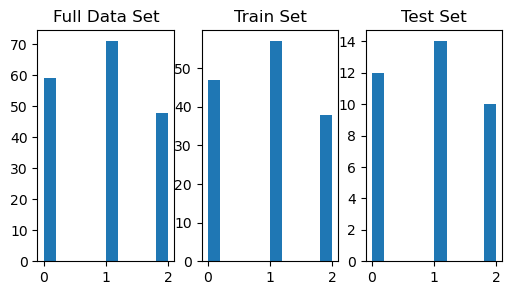

In [13]:
plt.figure(figsize=(6,3)) 
plt.subplot(1, 3, 1)
plt.hist(yw)
plt.title("Full Data Set")

plt.subplot(1, 3, 2)
plt.hist(yw_train)
plt.title("Train Set")

plt.subplot(1, 3, 3)
plt.hist(yw_test)
plt.title("Test Set");


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Ex. 2C. Train a KNN model 

For KNN classification, train a model using 5 neighbors.

You can change out the data set, by commenting out and recommenting the code block below for the iris, cancer, and wine dataset.

In [30]:
# """ For iris dataset analysis """
# X_train = Xi_train
# y_train = yi_train
# X_test =  Xi_test
# y_test =  yi_test
# target_names = iris.target_names



# """ For cancer dataset analysis """
# X_train = Xc_train
# y_train = yc_train
# X_test =  Xc_test
# y_test =  yc_test
# target_names = cancer.target_names


""" For wine dataset analysis """
X_train = Xw_train
y_train = yw_train
X_test =  Xw_test
y_test =  yw_test
target_names = wine.target_names

In [31]:
# set n_neighbors = 5 
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the training data, use fit()
knn.fit(X_train, y_train)

# compute the prediction of the test set using predict()
predict = knn.predict(X_test)

# compute the accuracy in predicting the test set 
# from sklearn.metrics import accuracy_score 
accVal = accuracy_score(y_test,predict)
print(accVal)

0.6944444444444444


We can see that the accuracy score for iris dataset is 0.94. For the same neighbor hyperparameter, what is the accuracy score for different datasets.

* What was the accuracy score for breast cancer dataset?  Ans : 94.4%
* What was the accuracy score for wine dataset? Ans: 69.4%

Rerun the above code, commenting out/in the different datasets above.  Do not duplicate the code cell.

<!-- END QUESTION -->

## Exercise 3: Performance Measures 

### Ex. 3A. Write your own functions 

From page 73 of the book, the performance metrics are defined. Create a functions for accuracy, sensitivity, specificity, recall, precision, positive predictive value, and negative predictive value. 

You can **not** use the built-in sklearn functions or any other python module. 

Refer to either class notes or textbook for these definitions. 

In [32]:
def accuracy(tp, fp, fn, tn):
    # Define an accuracy function 
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    return accuracy

def sensitivity(tp, fp, fn, tn):
    # Define a sensitivity function 
    sensitivity = tp/(tp+fn)
    return sensitivity

def specificity(tp, fp, fn, tn):
    # Define a specificity function 
    specificity = tn/(fp+tn)
    return specificity

def recall(tp, fp, fn, tn):
    # Define a recall function 
    recall = tp/(tp+fn)
    return recall

def precision(tp, fp, fn, tn):
    # Define a precision function
    precision = tp/(tp+fp)
    return precision

def negPredValue(tp, fp, fn, tn):
    # Define a negative predictive value function 
    npv = tn/(tn+fn)
    return npv

def posPredValue(tp, fp, fn, tn):
    # Define a positive predictive value function 
    ppv = tp/(tp+fp) # same as precision
    return ppv

def f1_score(tp, fp, fn, tn):
    # Define a f1-score function 
    f1_score = ( 2 * (tp/(tp+fp)) * tp/(tp+fn) ) / ( (tp/(tp+fp)) + tp/(tp+fn) )
    return f1_score

Test the function above for the binary case as detailed in Page [74] What values does the function return for accuracy, recall, specificity, precision, negPredValue, posPredValue and F1 score.

In [17]:
tp=3370.
tn=73.
fn=7.
fp=690.


accVal = accuracy(tp,fp,fn,tn)
sensVal = sensitivity(tp,fp,fn,tn)
specVal = specificity(tp,fp,fn,tn)
precVal = precision(tp,fp,fn,tn)
recVal = recall(tp,fp,fn,tn)
ppVal = posPredValue(tp,fp,fn,tn)
npVal = negPredValue(tp,fp,fn,tn)
f1Val = f1_score(tp,fp,fn,tn)

print("Accuracy: ", accVal)
print("sensitivity: ", sensVal)
print("specificity: ", specVal)
print("precision: ", precVal)
print("recall: ", recVal)
print("NegativePredictiveValue: ", npVal)
print("PositivePredictiveValue: ", ppVal)
print("f1_score:", f1Val)
print(tp, tn, fn, fp)

Accuracy:  0.8316425120772947
sensitivity:  0.9979271542789458
specificity:  0.09567496723460026
precision:  0.8300492610837439
recall:  0.9979271542789458
NegativePredictiveValue:  0.9125
PositivePredictiveValue:  0.8300492610837439
f1_score: 0.9062794137421003
3370.0 73.0 7.0 690.0


In [33]:
grader.check("q3a")

q3a results:
    q3a - 1 result:
        ❌ Test case failed
        Trying:
            dat1 = [3, 1, 2, 4]
        Expecting nothing
        ok
        Trying:
            dat2 = [5, 0, 3, 2]
        Expecting nothing
        ok
        Trying:
            dat3 = [4, 1, 1, 4]
        Expecting nothing
        ok
        Trying:
            accuracy(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.7 and recall(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.6 and np.isclose(negPredValue(dat1[0], dat1[1], dat1[2], dat1[3]), 0.66666)
        Expecting:
            np.True_
        **********************************************************************
        Line 4, in q3a 0
        Failed example:
            accuracy(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.7 and recall(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.6 and np.isclose(negPredValue(dat1[0], dat1[1], dat1[2], dat1[3]), 0.66666)
        Expected:
            np.True_
        Got:
            True

    q3a - 2 result:
        ❌ Test case failed
        Trying:
            dat1 = [3, 1, 2, 4]
        Expecting nothing
        ok
        Trying:
            sensitivity(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.6 and posPredValue(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.75 and np.isclose(f1_score(dat1[0], dat1[1], dat1[2], dat1[3]), 0.666666)
        Expecting:
            np.True_
        **********************************************************************
        Line 2, in q3a 1
        Failed example:
            sensitivity(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.6 and posPredValue(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.75 and np.isclose(f1_score(dat1[0], dat1[1], dat1[2], dat1[3]), 0.666666)
        Expected:
            np.True_
        Got:
            True

    q3a - 3 result:
        ✅ Test case passed

    q3a - 4 result:
        ❌ Test case failed
        Trying:
            dat2 = [5, 0, 3, 2]
        Expecting nothing
        ok
        Trying:
            sensitivity(dat2[0], dat2[1], dat2[2], dat2[3]) == 0.625 and precision(dat2[0], dat2[1], dat2[2], dat2[3]) == 1.0 and np.isclose(negPredValue(dat2[0], dat2[1], dat2[2], dat2[3]), 0.4)
        Expecting:
            np.True_
        **********************************************************************
        Line 2, in q3a 3
        Failed example:
            sensitivity(dat2[0], dat2[1], dat2[2], dat2[3]) == 0.625 and precision(dat2[0], dat2[1], dat2[2], dat2[3]) == 1.0 and np.isclose(negPredValue(dat2[0], dat2[1], dat2[2], dat2[3]), 0.4)
        Expected:
            np.True_
        Got:
            True

    q3a - 5 result:
        ❌ Test case failed
        Trying:
            dat2 = [5, 0, 3, 2]
        Expecting nothing
        ok
        Trying:
            recall(dat2[0], dat2[1], dat2[2], dat2[3]) == 0.625 and specificity(dat2[0], dat2[1], dat2[2], dat2[3]) == 1.0 and np.isclose(f1_score(dat2[0], dat2[1], dat2[2], dat2[3]), 0.76923)
        Expecting:
            np.True_
        **********************************************************************
        Line 2, in q3a 4
        Failed example:
            recall(dat2[0], dat2[1], dat2[2], dat2[3]) == 0.625 and specificity(dat2[0], dat2[1], dat2[2], dat2[3]) == 1.0 and np.isclose(f1_score(dat2[0], dat2[1], dat2[2], dat2[3]), 0.76923)
        Expected:
            np.True_
        Got:
            True

    q3a - 6 result:
        ✅ Test case passed

    q3a - 7 result:
        ❌ Test case failed
        Trying:
            dat3 = [4, 1, 1, 4]
        Expecting nothing
        ok
        Trying:
            accuracy(dat3[0], dat3[1], dat3[2], dat3[3]) == 0.8 and sensitivity(dat3[0], dat3[1], dat3[2], dat3[3]) == 0.8 and np.isclose(posPredValue(dat3[0], dat3[1], dat3[2], dat3[3]), 0.8)
        Expecting:
            np.True_
        **********************************************************************
        Line 2, in q3a 6
        Failed example:
            accuracy(dat3[0], dat3[1], dat3[2], dat3[3]) == 0.8 and sensitivity(dat3[0], dat3[1], dat3[2], d

### Ex. 3B. Practice computing performance metrics 


On the following 4 scenarias,  use the function developed earlier to compute the performance metrices. 

We have 100 objects: 90 of the positive class, and 10 of the negative class.
* A. The supervised learning algorithm correctly classified 45 of the positive class, and 5 of the negative class.
* B. The supervised learning algorithm correctly classified 10 of the positive class, and 9 of the negative class.

We have 100 objects: 50 of the positive class, and 50 of the negative class.
* C. The supervised learning algorithm correctly classified 40 of the positive class, and 10 of the negative class.
* D. The supervised learning algorithm correctly classified 40 of the positive class, and 40 of the negative class.


What is the computed accuracy, precision, recall and f1 score for the above problem?

In [34]:
# We know that we have 100 objects: 90 of the positive class, and 10 of the negative class.
# a) Correctly classified 45 of the positive class, and 5 of the negative class.
tpA= 45
tnA= 5
fnA= 45
fpA= 5
print("\nOutput A \n")
print(accuracy(tpA,fpA,fnA,tnA))
print(precision(tpA,fpA,fn,tnA))
print(recall(tpA,fpA,fnA,tnA))
print(f1_score(tpA,fpA,fnA,tnA))


# b. Correctly classified 10 of the positive class, and 9 of the negative class.
tpB= 10
tnB= 9
fnB= 80
fpB= 1
print("\nOutput B \n")
print(accuracy(tpB,fpB,fnB,tnB))
print(precision(tpB,fpB,fnB,tnB))
print(recall(tpB,fpB,fnB,tnB))
print(f1_score(tpB,fpB,fnB,tnB))


# We know that we have 100 objects: 50 of the positive class, and 50 of the negative class.
# c. correctly classified 40 of the positive class, and 10 of the negative class.
tpC= 40
tnC= 10
fnC= 10
fpC= 40
print("\nOutput C \n")
print(accuracy(tpC,fpC,fnC,tnC))
print(precision(tpC,fpC,fnC,tnC))
print(recall(tpC,fpC,fnC,tnC))
print(f1_score(tpC,fpC,fnC,tnC))


#  d. correctly classified 40 of the positive class, and 40 of the negative class
tpD= 40
tnD= 40
fnD= 10
fpD= 10
print("\nOutput D \n")
print(accuracy(tpD,fpD,fnD,tnD))
print(precision(tpD,fpD,fnD,tnD))
print(recall(tpD,fpD,fnD,tnD))
print(f1_score(tpD,fpD,fnD,tnD))



Output A 

0.5
0.9
0.5
0.6428571428571429

Output B 

0.19
0.9090909090909091
0.1111111111111111
0.198019801980198

Output C 

0.5
0.5
0.8
0.6153846153846154

Output D 

0.8
0.8
0.8
0.7999999999999999


In [35]:
grader.check("q3b")

q3b results: All test cases passed!

### Ex. 3C. Use `scikit-learn` performance measure methods 

Now that we have looked into performance metrics, we can use the inbuilt function to measure performance metrics. 

First, let's look at the classification report.

Then, precision, recall and f1-score. 

In [36]:
# Use evaluation functions from metrics module. 
from sklearn.metrics import precision_score, recall_score, f1_score

# Model for Cancer
# remember names for data 
#  Xc_train, yc_train, ...  
#  cancer.target_names
knnC = neighbors.KNeighborsClassifier(n_neighbors = 5)

# train the classifier using the training data, use fit()
knnC.fit(Xc_train, yc_train)

# compute the prediction of the test set using predict()
predictC = knnC.predict(Xc_test)

precValC = precision_score(yc_test, predictC)
recValC = recall_score(yc_test, predictC)
f1ValC = f1_score(yc_test, predictC)

print(metrics.classification_report(yc_test, predictC))
print ("precision: ", precValC)
print ("recall:    ", recValC)
print ("F1 score:  ", f1ValC)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

precision:  0.9659090909090909
recall:     0.9444444444444444
F1 score:   0.9550561797752809


In [37]:
grader.check("q3c")

q3c results:
    q3c - 1 result:
        ❌ Test case failed
        Trying:
            np.isclose(metrics.accuracy_score(yc_test, predictC), 0.944055944)
        Expecting:
            np.True_
        **********************************************************************
        Line 1, in q3c 0
        Failed example:
            np.isclose(metrics.accuracy_score(yc_test, predictC), 0.944055944)
        Expected:
            np.True_
        Got:
            True

## Ex. 4. Three-fold Split  

Create and explore a visualization for the when number of neighbors in KNN is changed from 1 to 25 and different weighting hyperparameters are used for KNN on the cancer data set. 

Use the following procedure:

* Split the data into training (60%), validation (20%), and testing (20%)
    * To maintain consistency among students, let's use random state of 25
* Use nested for-loops
    * the first loop should take care of weights and second loop needs to take care of the no. of neighbors. 
    * Inside the loops, you will have to build the knn, train the model and compute the accuracy on train and test sets 
    * The training and testing accuracy for each weight/neighbor combination can be stored
* Plot the testing accuracy versus the number of neighbors 
    * one line for each way of calculating the weights
* Report out the best hyperparameter combination 
* Using the best hyperparameters, retrain a model on the train + val set  
    * report the performance on the test set

*Hint* Look at and adapt the last example in `nb_week10` for this problem. 

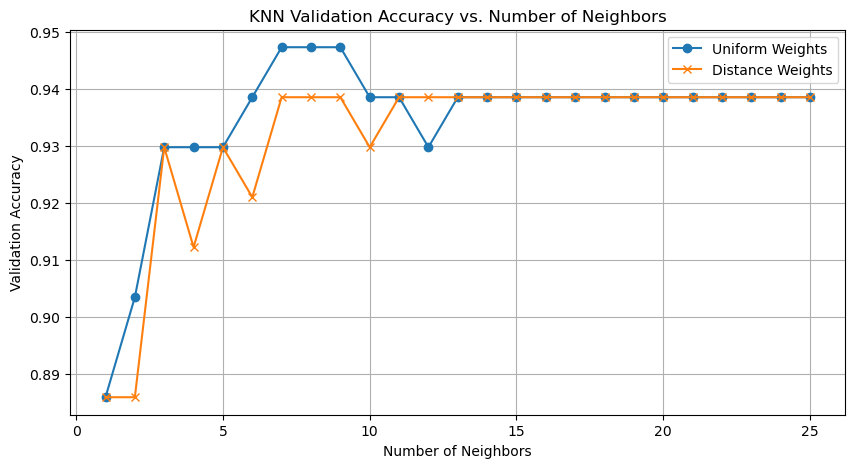

Best validation accuracy: 0.94736842
Best weights: uniform
Best n_neighbors: 7
Test-set accuracy: 0.921


In [23]:
from sklearn.neighbors import KNeighborsClassifier
X_trainval, X_test, y_trainval, y_test = train_test_split(Xc, yc, test_size=0.2, random_state=25)

# Split trainval into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=25)

# Weight options and range for k (neighbors)
wt_options = ['uniform', 'distance']
k_range = range(1, 26)  # Neighbors from 1 to 25

# Initialize an array to store accuracy values
acc_vals = np.zeros([2, 25])  # 2 for weight options, 25 for neighbors

# Create for loop for weights first
for w in range(len(wt_options)):
    
    # Create for loop for neighbors
    for k in k_range:
    
        # Build a KNN model
        clf = KNeighborsClassifier(n_neighbors=k, weights=wt_options[w])
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict y-values on the validation set
        pred_val = clf.predict(X_val)
        
        # Calculate performance (accuracy) on validation set
        acc_vals[w, k-1] = accuracy_score(y_val, pred_val)

# Plot the results
fig = plt.figure(figsize=(10, 5))
plt.plot(k_range, acc_vals[0, :], label='Uniform Weights', marker='o')
plt.plot(k_range, acc_vals[1, :], label='Distance Weights', marker='x')
plt.title('KNN Validation Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the best validation accuracy and the corresponding hyperparameters
best_val_acc = np.max(acc_vals)  # Best accuracy
print("Best validation accuracy: %.8f" % best_val_acc)

# Get the index of the best score
max_ind = np.unravel_index(np.argmax(acc_vals), acc_vals.shape)
best_wts = wt_options[max_ind[0]]  # Corresponding weight option
best_nbrs = k_range[max_ind[1]]  # Corresponding number of neighbors
print("Best weights: %s" % best_wts)
print("Best n_neighbors: %d" % best_nbrs)

# Retrain model on the combined train + validation set
knn = KNeighborsClassifier(n_neighbors=best_nbrs, weights=best_wts)
knn.fit(X_trainval, y_trainval)

# Predict and evaluate on the test set
test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print("Test-set accuracy: %.3f" % test_acc)

In [24]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        ❌ Test case failed
        Trying:
            np.isclose(best_val_acc, 0.94736842)
        Expecting:
            np.True_
        **********************************************************************
        Line 1, in q4 0
        Failed example:
            np.isclose(best_val_acc, 0.94736842)
        Expected:
            np.True_
        Got:
            True

## Congratulations! You have completed Lab 12! 

Make sure to run and save a clean submission before uploading to Gradescope. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [25]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1c results: All test cases passed!

    q2a results: All test cases passed!

    q3a results:
        q3a - 1 result:
            ❌ Test case failed
            Trying:
                dat1 = [3, 1, 2, 4]
            Expecting nothing
            ok
            Trying:
                dat2 = [5, 0, 3, 2]
            Expecting nothing
            ok
            Trying:
                dat3 = [4, 1, 1, 4]
            Expecting nothing
            ok
            Trying:
                accuracy(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.7 and recall(dat1[0], dat1[1], dat1[2], dat1[3]) == 0.6 and np.isclose(negPredValue(dat1[0], dat1[1], dat1[2], dat1[3]), 0.66666)
            Expecting:
                np.True_
            **********************************************************************
            L